In [ ]:
import pandas_datareader as pdr

In [ ]:
import yfinance

In [ ]:
!pip install yfinance

In [ ]:
import yfinance

In [5]:
import pandas_datareader as pdr
import datetime 

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2020, 1, 1), 
                          end=datetime.datetime(2020, 9, 4))

print(aapl)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-01-02   75.150002   73.797501   74.059998   75.087502  135480400.0   
2020-01-03   75.144997   74.125000   74.287498   74.357498  146322800.0   
2020-01-06   74.989998   73.187500   73.447502   74.949997  118387200.0   
2020-01-07   75.224998   74.370003   74.959999   74.597504  108872000.0   
2020-01-08   76.110001   74.290001   74.290001   75.797501  132079200.0   
...                ...         ...         ...         ...          ...   
2020-08-31  131.000000  126.000000  127.580002  129.039993  225702700.0   
2020-09-01  134.800003  130.529999  132.759995  134.179993  152470100.0   
2020-09-02  137.979996  127.000000  137.589996  131.399994  200119000.0   
2020-09-03  128.839996  120.500000  126.910004  120.879997  254723200.0   
2020-09-04  123.699997  110.889999  120.070000  120.959999  332607163.0   

             Adj Close  

In [6]:
import pandas as pd
aapl.to_csv('data/aapl_stock_prices.csv')

In [7]:
df = pd.read_csv('data/aapl_stock_prices.csv', header=0, index_col='Date', parse_dates=True)

In [8]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.573036
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.848030
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.436470
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,74.086395
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.278160
...,...,...,...,...,...,...
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,129.039993
2020-09-01,134.800003,130.529999,132.759995,134.179993,152470100.0,134.179993
2020-09-02,137.979996,127.000000,137.589996,131.399994,200119000.0,131.399994


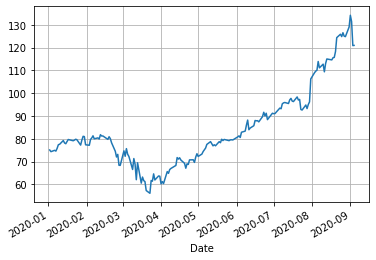

In [9]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

In [11]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2020, 1, 1), datetime.datetime(2020, 9, 4))

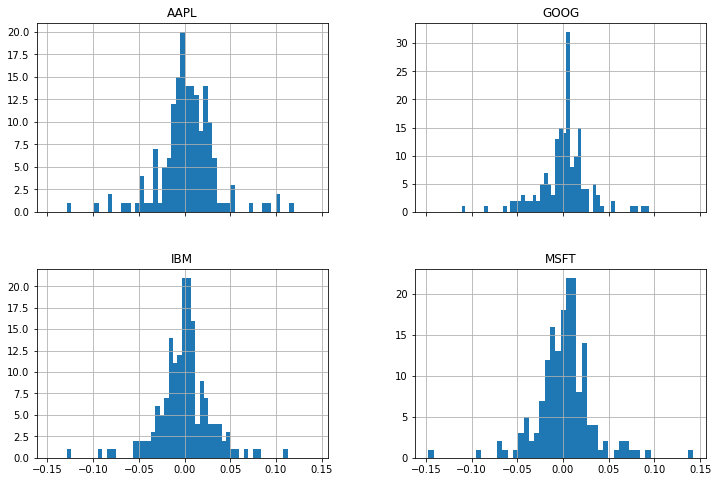

In [12]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [14]:
import yfinance as yf

ftse_tickers = ['^FTSE','III','ADM','AAL','ANTO','AHT','ABF','AZN','AUTO','AVST','AVV','AV','BA','BARC','BDEV','BKG','BHP','BP','BATS','BLND','BT-A','BNZL','BRBY',
'CCH','CPG','CRH','CRDA','DCC','DGE','EVR','EXPN','FERG','FLTR','FRES','GSK','GLEN','GVC','HLMA','HL','HIK','HSV','HSBA','IMB','INF','IHG','ICP',
'IAG','ITRK','ITV','JD','JMAT','JET','KGF','LAND','LGEN','LLOY','LSE','MNG','MRO','MNDI','MRW','NG','NXT','OCDO','PSON','PNN','PSN',
'PHNX','POLY','PRU','RB','REL','RTO','RIO','RMV','RR','RDSA','RSA','SGE','SBRY','SDR','SMT','SGRO','SVT','SN','SMDS','SMIN','SKG','SPX','SSE',
'STAN','SLA','STJ','TW','TSCO','ULVR','UU','VOD','WTB','WPP']

ftse = pd.DataFrame()

for ticker in ftse_tickers:
    
    if ticker == '^FTSE':
        stock = yf.download(ticker, start="2015-08-13", end="2020-08-12")
      
    else:
        stock = yf.download(ticker + '.L', start="2015-08-13", end="2020-08-12")
    
    ftse[ticker] = stock['Adj Close']



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [15]:
ftse.to_csv('data/ftse_stocks.csv', index=True)

In [16]:
help(yf)

Help on package yfinance:

NAME
    yfinance

DESCRIPTION
    # -*- coding: utf-8 -*-
    #
    # Yahoo! Finance market data downloader (+fix for Pandas Datareader)
    # https://github.com/ranaroussi/yfinance
    #
    # Copyright 2017-2019 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    #

PACKAGE CONTENTS
    base
    multi
    shared
    ticker
    tickers
    utils

CLASSES
    builtins.object
        yfinance.tickers.Tickers
   

In [17]:
dir(yf)

['Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'download',
 'multi',
 'pdr_override',
 'shared',
 'ticker',
 'tickers',
 'utils']